Project Detail

In this dataset, the information about accidents in 12 manufacturing plants in 3 countries are given by a brazilian company, IHM Stefanini. We need to use this dataset to understand why accidents occur, and discover clues to reduce tragedic accidents.

Dataset columns are below:

Date : timestamp or time/date information
Countries : which country the accident occurred (anonymized)
Local : the city where the manufacturing plant is located (anonymized)
Industry sector : which sector the plant belongs to
Accident level : from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
Potential Accident Level : Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
Genre : if the person is male of female
Employee or Third Party : if the injured person is an employee or a third party
Critical Risk : some description of the risk involved in the accident
Description : Detailed description of how the accident happened

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
!wget "https://raw.githubusercontent.com/gauravpks/ml-repo/master/IndustrialSafetyDS/industrial_safety.csv"

--2020-12-27 15:43:43--  https://raw.githubusercontent.com/gauravpks/ml-repo/master/IndustrialSafetyDS/industrial_safety.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192153 (188K) [text/plain]
Saving to: ‘industrial_safety.csv.1’

industrial_safety.c 100%[===================>] 187.65K  --.-KB/s    in 0.03s   

2020-12-27 15:43:43 (7.07 MB/s) - ‘industrial_safety.csv.1’ saved [192153/192153]



In [45]:
df= pd.read_csv("https://raw.githubusercontent.com/gauravpks/ml-repo/master/IndustrialSafetyDS/industrial_safety.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      424 non-null    object
 1   Countries                 424 non-null    object
 2   Local                     424 non-null    object
 3   Industry Sector           424 non-null    object
 4   Accident Level            424 non-null    object
 5   Potential Accident Level  424 non-null    object
 6   Gender                    424 non-null    object
 7   Employee or Third Party   424 non-null    object
 8   Critical Risk             424 non-null    object
 9   Description               424 non-null    object
dtypes: object(10)
memory usage: 33.2+ KB


In [47]:
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee or Third Party,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [48]:
df.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Gender', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [49]:
df=df.rename(columns={'Data': 'Date', 'Countries':'Country','Local':'City', 'Industry Sector':'Industry', 'Accident Level':'Accident Level', 'Employee or Third Party': 'Emp_Type'})

In [50]:
df.head()

,Date,Country,City,Industry,Accident Level,Potential Accident Level,Gender,Emp_Type,Critical Risk,Description
0,01-01-2016 00:00,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,02-01-2016 00:00,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,06-01-2016 00:00,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,08-01-2016 00:00,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,10-01-2016 00:00,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


# Data Pre Processing 

In [51]:
df["Date"]= pd.to_datetime(df["Date"])
df["Year"]= df["Date"].apply(lambda x: x.year)
df["Month"]= df["Date"].apply(lambda x:x.month)
df["Day"]= df["Date"].apply(lambda x:x.day)
df["Weekday"]= df["Date"].apply(lambda x:x.day_name())
df["Weekofyear"]= df["Date"].apply(lambda x:x.weekofyear)

In [52]:
df.head()

,Date,Country,City,Industry,Accident Level,Potential Accident Level,Gender,Emp_Type,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22
3,2016-08-01,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31
4,2016-10-01,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39


In [53]:
### Accordin to this discussion, countries are from North America. As per knowledge there are four climatological seasons as below. Spring : September to November Summer : December to February Autumn : March to May Winter : June to August We can create seasonal variable based on month variable.

In [54]:
def monthtoseason(x):
  if x in [1,2,3]:
    season= "Spring"
  elif x in [4,5,6]:
    season= "Summer"
  elif x in [7,8,9]:
    season= "Autumn"
  elif x in [10,11,12]:
    season= "Winter"
  return season        

df["Season"]= df["Month"].apply(monthtoseason)

In [55]:
df.head()

,Date,Country,City,Industry,Accident Level,Potential Accident Level,Gender,Emp_Type,Critical Risk,Description,Year,Month,Day,Weekday,Weekofyear,Season
0,2016-01-01,United States,West Virginia,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,Spring
1,2016-02-01,Canada,Alberta,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,2,1,Monday,5,Spring
2,2016-06-01,United States,Kentucky,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,6,1,Wednesday,22,Summer
3,2016-08-01,United States,Illinois,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,8,1,Monday,31,Autumn
4,2016-10-01,United States,Illinois,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,10,1,Saturday,39,Winter


# Exploratory Data Analysis


***UNIVARIATE ANALYSIS ***

**Accident by Seasons**

In [56]:
df["Season"].value_counts()


Spring    133
Summer    130
Autumn     85
Winter     76
Name: Season, dtype: int64

In [57]:
season_cnt= np.round(df["Season"].value_counts(normalize= True)*100,2)
season_cnt

Spring    31.37
Summer    30.66
Autumn    20.05
Winter    17.92
Name: Season, dtype: float64

In [58]:
percent= season_cnt.to_numpy()
season_name= season_cnt.keys().values

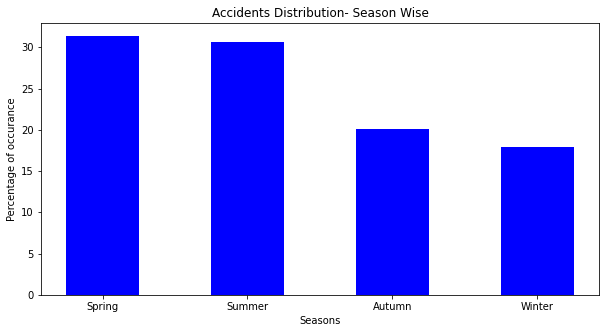

In [59]:
fig = plt.figure(figsize = (10, 5)) 
plt.bar(season_name, percent, color="blue", width= 0.5)
plt.title("Accidents Distribution- Season Wise")
plt.xlabel("Seasons")
plt.ylabel("Percentage of occurance")
plt.show()

**By Accident Level**

In [60]:
Accident_level_cnt= np.round(df["Accident Level"].value_counts(normalize=True)*100)

In [61]:
percent = Accident_level_cnt.to_numpy()
Acc_level_type= Accident_level_cnt.keys().values

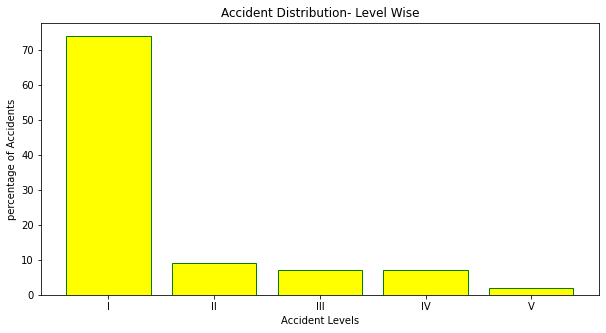

In [62]:
fig= plt.figure(figsize=(10,5))
plt.bar(Acc_level_type, percent,color="yellow" ,edgecolor="green")
plt.xlabel("Accident Levels")
plt.ylabel("percentage of Accidents")
plt.title("Accident Distribution- Level Wise")
plt.show()

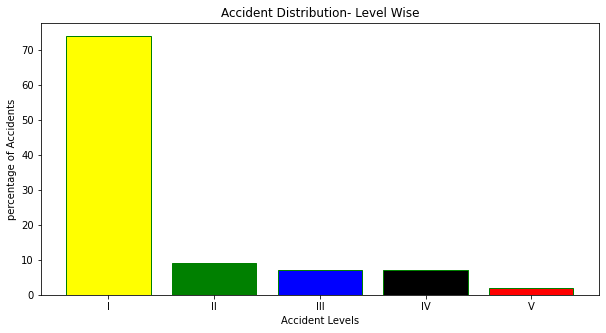

In [63]:
# Just to show in Different Colors 
fig= plt.figure(figsize=(10,5))
plt.bar(Acc_level_type, percent,color=["yellow","green","blue","black","red"] ,edgecolor="green")
plt.xlabel("Accident Levels")
plt.ylabel("percentage of Accidents")
plt.title("Accident Distribution- Level Wise")
plt.show()

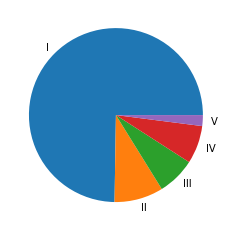

In [64]:
plt.pie(percent, labels= Acc_level_type);

**Accidents By Gender**

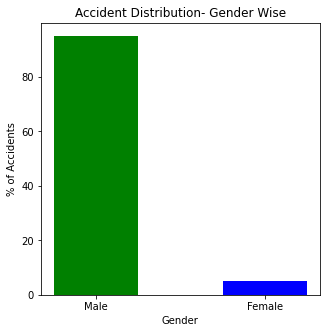

In [65]:
gender_cnt = np.round(df['Gender'].value_counts(normalize=True) * 100)
fig = plt.figure(figsize = (5, 5)) 
plt.bar(gender_cnt.keys().values, gender_cnt.to_numpy(), color=[ 'green', 'blue'], width = 0.5) 
plt.xlabel("Gender") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Gender Wise") 
plt.show()


**By Employee Type**

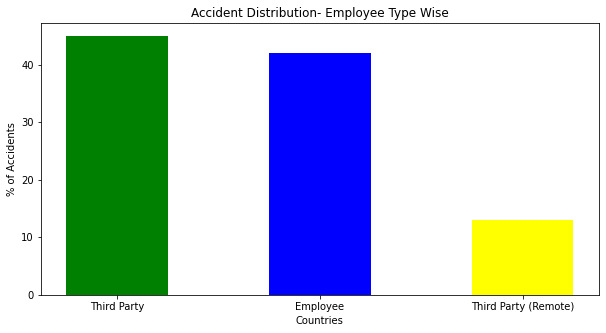

In [66]:
Emp_Type_cnt = np.round(df['Emp_Type'].value_counts(normalize=True) * 100)
fig = plt.figure(figsize = (10, 5)) 
plt.bar(Emp_Type_cnt.keys().values, Emp_Type_cnt.to_numpy(), color=[ 'green', 'blue', 'yellow'], width = 0.5) 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Employee Type Wise") 
plt.show()

**Accident By Country**

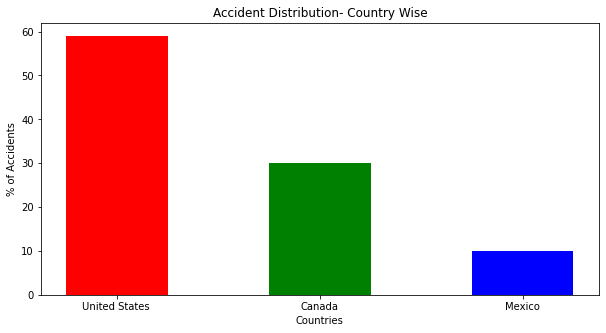

In [67]:
country_cnt =np.round((df['Country'].value_counts(normalize=True)* 100 ))
fig = plt.figure(figsize = (10, 5)) 
plt.bar(country_cnt.keys().values, country_cnt.to_numpy(), color =['red', 'green', 'blue'], width = 0.5) 
plt.xlabel("Countries") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Country Wise") 
plt.show()

**Accidents By City**

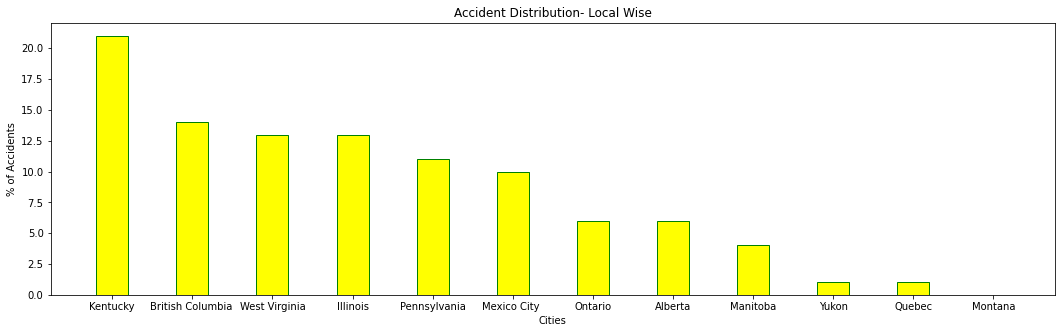

In [68]:
city_cnt = np.round(df['City'].value_counts(normalize=True) * 100)
fig = plt.figure(figsize = (18, 5)) 
plt.bar(city_cnt.keys().values, city_cnt.to_numpy(), color ='yellow', width = 0.4, edgecolor='green') 
plt.xlabel("Cities") 
plt.ylabel("% of Accidents") 
plt.title("Accident Distribution- Local Wise") 
plt.show()

**Accidents Industry Wise**

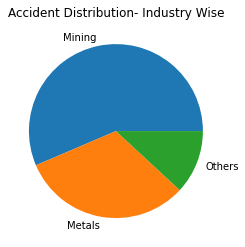

In [69]:
ind_cnt= np.round(df['Industry'].value_counts(normalize=True) * 100)
plt.pie(ind_cnt.to_numpy(), labels = ind_cnt.keys().values) 
plt.title("Accident Distribution- Industry Wise")  
plt.show() 

***MULTIVARIATE ANALYSIS***

**Accidents Depending on Accident Level & Potential Accident Level**

In [70]:
ac_level_cnt = np.round(df['Accident Level'].value_counts(normalize=True) * 100)
pot_ac_level_cnt = np.round(df['Potential Accident Level'].value_counts(normalize=True) * 100, decimals=2)

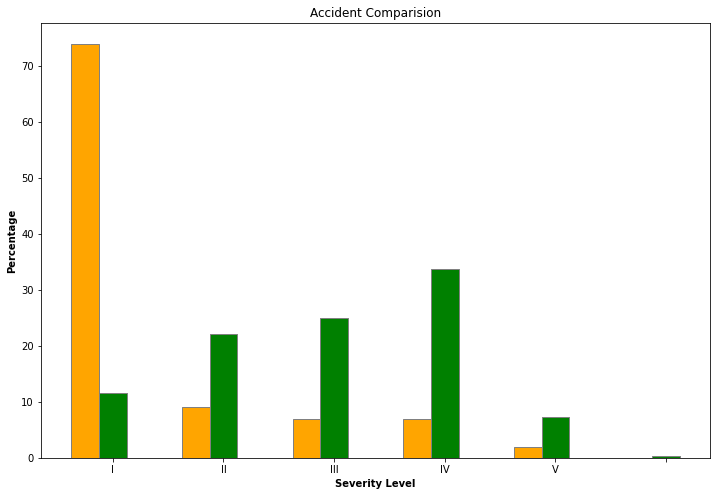

In [71]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
idx = [3, 2, 1, 0, 4, 5]   
# set height of bar 
ac_cnt = np.append(ac_level_cnt.to_numpy(), 0)
pot_cnt = pot_ac_level_cnt.to_numpy()[idx]

# Set position of bar on X axis 
br1 = np.arange(len(ac_cnt)) 
br2 = [x + barWidth for x in br1] 

   
# Make the plot 
plt.bar(br1, ac_cnt, color ='orange', width = barWidth, 
        edgecolor ='grey', label ='Accident Level') 
plt.bar(br2, pot_cnt, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Potential Accident Level') 

   
# Adding Xticks  
plt.xlabel('Severity Level', fontweight ='bold') 
plt.ylabel('Percentage', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(br1))], 
           ac_level_cnt.keys().values) 
plt.title("Accident Comparision")   
plt.show() 